# Movie Industry Analysis for Potential Microsoft Studio Venture 

For this project I wanted to analyzie my data with a earnings driven view. I spent a long time working to create a database by merging and fillin NaN values that represented the top 5 grossing movies per year since 2010. In my inital anyasis of domestic gross for movies I saw that nearly 25% of the total gross game from just those top 5 movies. I felt that as a company Microsofy studios would be driven to replicate these results and thus I dove into the trends and factors that seemed to be constant among those movies. For the second question I looked at top 5 earning movies and created a recommendation for Microsoft on what type of movies to make. 

In my slide deck I address the following questions: 
1. What current trends are evident in the movie industy? 
2. What share of the market does the top 5 earning movies represent? 
3. Based on the top 5 movie earners what type of movie should Microsoft produce? 

Important information to note is that I only looked at domestic gross during my anaylsis. I could not find any information about whether or not the foreign gross figures had been adjusted to account for currency exchange rates. This was an important factor to consider in my opinion because if the figures had not been adjusted there would be a false inflation due to countries with very weak dollars - i.e. the gross from India unadjusted would not be a meaningful comarison to Germany's gross unadjusted. The other reason I wanted to focus soley on the US market was that I felt analyzing global trends would be painting with a broad brush and I wanted to really drill down into the data. Finally, most of the movies in the IMBD data had a primary market of the US and I would position Mircosoft to target US movie intest and sales (which would naturally be also produced internationally) in it's first 5 years before looking to target any global trends. The other piece of statically relevant information is that I am using nominal values in my analysis. Future work would inculde adjusting for inflation in my figures which the statistcs bureau sights was 19%. 

Finally the work below does not correlate to my slide deck or ReadMe anaylsis. Due to water damage my computer is completely dead. While saving my work diligently I was not pushing anything back up to github. I have learned a valuable lesson about making sure my information is available both globally and locally through this experience. Luckily all of my graphics were in my slide deck before this happened so the conclusions drawn there represent extensive work done prior to this accident. Rather than attempt to recreate over 50 hours of work below I have modeled my EDA analysis methods and produced new visuals to acompany the new work.  

In [1]:
#Install Libraries 
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in IMDB Name Basics 
imdb_title = pd.read_csv('imdb.name.basics.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') 

imdb_title 

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [3]:
#Read in IMDB title akas 
imdb_akas = pd.read_csv('imdb.title.akas.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') 

imdb_akas 

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [4]:
#Read in IMDB title basics 
imdb_basics = pd.read_csv('imdb.title.basics.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') 

imdb_basics 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [5]:
#Read in IMDB title crew
imdb_crew = pd.read_csv('imdb.title.crew.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') 

imdb_crew 

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [6]:
#Read in IMDB title principals 
imdb_principals = pd.read_csv('imdb.title.principals.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') 

imdb_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [7]:
#Read in IMDB title ratings 
imdb_ratings = pd.read_csv('imdb.title.ratings.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') 

imdb_ratings 

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
#Merging the dataframes 
imdb_rating_principal = pd.merge(imdb_principals, imdb_ratings, on='tconst', how='outer') 
imdb_rating_principal_crew = pd.merge(imdb_rating_principal, imdb_crew, on='tconst', how='outer') 
imdb_rating_principal_crew_basics = pd.merge(imdb_rating_principal_crew, imdb_basics, on='tconst', how='outer') 
imdb_rating_principal_crew_basics_akas = pd.merge(imdb_rating_principal_crew_basics, imdb_akas,
                                                  left_on="tconst", right_on="title_id", how='outer')
imdb_rating_principal_crew_basics_akas_title = pd.merge(imdb_rating_principal_crew_basics_akas, imdb_title, 
                                                       on="nconst", how='outer')
imdb_rating_principal_crew_basics_akas_title

,tconst,ordering_x,nconst,category,job,characters,averagerating,numvotes,directors,writers,...,region,language,types,attributes,is_original_title,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1.0,nm0246005,actor,NaN,"[""The Man""]",NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2.0,nm0398271,director,NaN,NaN,NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5.0,nm0398271,director,NaN,NaN,7.8,6.0,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3.0,nm3739909,producer,producer,NaN,NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10.0,nm0059247,editor,NaN,NaN,3.9,2328.0,nm0362736,nm0362736,...,GB,NaN,working,NaN,0.0,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978138,NaN,NaN,nm9467868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Kyle Johnson,NaN,NaN,writer,NaN
2978139,NaN,NaN,nm9475692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Kathy Simmons,NaN,NaN,"camera_department,director,assistant_director","tt7713388,tt7713308"
2978140,NaN,NaN,nm9495701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Daryl Stacey Williamson,NaN,NaN,"director,actor,writer",NaN
2978141,NaN,NaN,nm9922562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Pui-Pui Leung,NaN,NaN,writer,tt5269560


In [9]:
#Resetting the DF name for brevity and to preserve orignial df 
df = imdb_rating_principal_crew_basics_akas_title

In [10]:
df.head()

,tconst,ordering_x,nconst,category,job,characters,averagerating,numvotes,directors,writers,...,region,language,types,attributes,is_original_title,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1.0,nm0246005,actor,NaN,"[""The Man""]",NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2.0,nm0398271,director,NaN,NaN,NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5.0,nm0398271,director,NaN,NaN,7.8,6.0,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3.0,nm3739909,producer,producer,NaN,NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10.0,nm0059247,editor,NaN,NaN,3.9,2328.0,nm0362736,nm0362736,...,GB,NaN,working,NaN,0.0,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


In [11]:
#DF shape view 
df.shape

(2978143, 28)

In [12]:
#Viewing NaN values
df.isna().sum()

tconst                   2358
ordering_x               5170
nconst                   2812
category                 5170
job                   2233580
characters            1827116
averagerating          521995
numvotes               521995
directors               22793
writers                268184
primary_title            2358
original_title           2390
start_year               2358
runtime_minutes        282993
genres                  34949
title_id               136867
ordering_y             136867
title                  136867
region                 597637
language              2598418
types                 1425498
attributes            2842192
is_original_title      136892
primary_name             3302
birth_year            1835363
death_year            2930366
primary_profession      95961
known_for_titles        49610
dtype: int64

In [13]:
#Dropping columns with high NaN values 

#langauge- over 87% of the column is Nan   
#attributes - over 95% of the column is Nan  
#death_year - over 98% of the column is Nan 
#birth_year - over 61% of the column is Nan 
#The job - over 74% of the column is Nan  
#characters - over 61% of the column is Nan
df.drop(["language", "attributes", "death_year","birth_year", "job", "characters"], axis =1, inplace=True) 

#directors and writers columns - they are a repeat of the nconstant 
#title_id - a repeat of the tconstant 
df.drop(["title_id", "directors", "writers"], axis =1, inplace=True)

# Question 1: What is the correlation between runtime & genre?

In [14]:
#Creating a new df to isolate the genre/ runtime data 
runtime_genres =  df.drop(["nconst", "tconst", "ordering_x", "category", "averagerating", "numvotes", "primary_title", 
        "original_title", "start_year", "ordering_y", "title", "region", "types",
       "is_original_title", "primary_name", "primary_profession", "known_for_titles"], axis =1) 

In [15]:
#DF Shape
runtime_genres.shape 
#(2978143, 2)

(2978143, 2)

In [16]:
#NaN values
runtime_genres.isna().sum()

runtime_minutes    282993
genres              34949
dtype: int64

In [17]:
#Drop the genre rows that have nan values - with more time you could look at the occurance of each genre and then replace
#it with a random genre
runtime_genres.dropna(subset= ['genres'], inplace= True)

In [18]:
#Calculating Runtime Mean
runtime_genres['runtime_minutes'].mean() 
#97.96914147492264

97.96914147492264

In [19]:
#Calculating Runtime Median 
runtime_genres['runtime_minutes'].median()  
#95.0

95.0

In [20]:
#Calculating Runtime Mode  
runtime_genres['runtime_minutes'].mode()  
#90

0    90.0
dtype: float64

In [21]:
#Replacing NaN values with Runtime Median give mode is 90  
runtime_genres.fillna(95)

,runtime_minutes,genres
0,75.0,Comedy
1,75.0,Comedy
2,95.0,Comedy
3,75.0,Comedy
4,96.0,"Drama,Horror"
...,...,...
2975749,46.0,"Documentary,History"
2975759,95.0,"Comedy,Family"
2975779,78.0,Documentary
2975782,95.0,Comedy


In [22]:
#Calculation Correlation 
runtime_genres.apply(lambda x: x.factorize()[0]).corr() 

#no meaningful correlation found 

,runtime_minutes,genres
runtime_minutes,1.000000,0.053268
genres,0.053268,1.000000


In [ ]:
#Visualizing run time vs genres
ax = sns.barplot(x="genres", y="runtime_minutes", data=runtime_genres)  

# Question 2:  How many "Comedy" movies are released each year? 

In [50]:
#Creating a new df to isolate the genre/ year data 
year_genres =  df.drop(["nconst", "tconst", "ordering_x", "category", "averagerating", "numvotes", "primary_title", 
        "original_title", "ordering_y", "title", "region", "types",
       "is_original_title", "primary_name", "primary_profession", "known_for_titles", "runtime_minutes"], axis =1) 

In [ ]:
#Printing the DF
year_genres

In [ ]:
#DF Shape
year_genres.shape 
#(2978143, 2)

In [ ]:
#NaN values
year_genres.isna().sum()

In [ ]:
#Drop the genre rows that have nan values - with more time you could look at the occurance of each genre and then replace
#it with a random genre
year_genres.dropna(subset= ['genres'], inplace= True)

In [ ]:
#Isolate the Comedy movies 
year_genres = year_genres.sort_index()
comedy_years = year_genres.loc[year_genres["genres"] == "Comedy"]

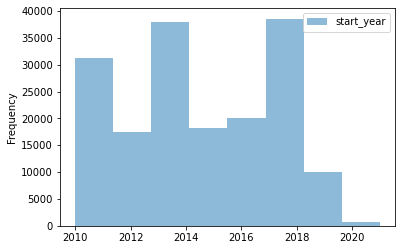

In [87]:
#Visualizing number of comedy films released each year
ax = comedy_years.plot.hist(bins=8, alpha=0.5)

# Question 3: What is the average IMDB rating for a Comedy? 

In [14]:
#Creating a new df to isolate the genre/ rating data 
rating_genres =  df.drop(["nconst", "tconst", "ordering_x", "category", "start_year", "numvotes", "primary_title", 
        "original_title", "ordering_y", "title", "region", "types",
       "is_original_title", "primary_name", "primary_profession", "known_for_titles", "runtime_minutes"], axis =1) 

In [15]:
#Printing the DF
rating_genres

,averagerating,genres
0,NaN,Comedy
1,NaN,Comedy
2,7.8,Comedy
3,NaN,Comedy
4,3.9,"Drama,Horror"
...,...,...
2978138,NaN,NaN
2978139,NaN,NaN
2978140,NaN,NaN
2978141,NaN,NaN


In [16]:
#DF Shape
rating_genres.shape 
#(2978143, 2)

(2978143, 2)

In [17]:
#NaN values
rating_genres.isna().sum()

averagerating    521995
genres            34949
dtype: int64

In [18]:
#Drop the genre rows that have nan values - with more time you could look at the occurance of each genre and then replace
#it with a random genre
rating_genres.dropna(subset= ['genres'], inplace= True)

In [23]:
#Group the DF by genre
group_ratings = rating_genres.groupby('genres').mean() 

,averagerating
genres,
Action,5.499548
"Action,Adult,Comedy",4.233333
"Action,Adventure",5.126467
"Action,Adventure,Animation",6.925376
"Action,Adventure,Biography",7.060359
...,...
"Thriller,War,Western",NaN
"Thriller,Western",6.454348
War,5.947144


In [26]:
#Reset the index
group_ratings.reset_index()

,genres,averagerating
0,Action,5.499548
1,"Action,Adult,Comedy",4.233333
2,"Action,Adventure",5.126467
3,"Action,Adventure,Animation",6.925376
4,"Action,Adventure,Biography",7.060359
...,...,...
1080,"Thriller,War,Western",NaN
1081,"Thriller,Western",6.454348
1082,War,5.947144
1083,"War,Western",NaN


In [31]:
#Drop any NaN values - I attempted to insert to mean but it kept breaking my kernel
group_ratings.dropna(inplace=True)

In [37]:
group_ratings.reset_index(inplace=True)

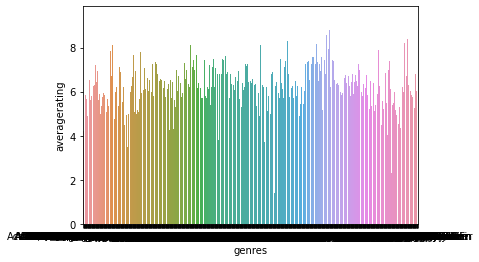

In [38]:
ax = sns.barplot(x="genres", y="averagerating", data=group_ratings)  

In [40]:
#STD calculation
group_ratings1 = rating_genres.groupby('genres').std() 

In [46]:
#Reset the index
group_ratings1.reset_index(inplace=True)

In [43]:
#Drop any NaN values - I attempted to insert to mean but it kept breaking my kernel
group_ratings1.dropna(inplace=True)

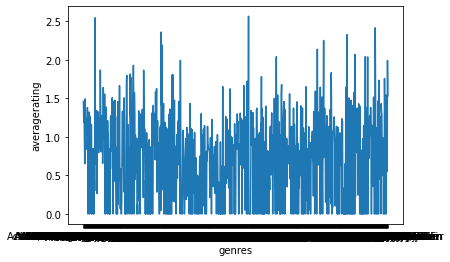

In [47]:
#Visualizing the STD 
sns.lineplot(data=group_ratings1, x="genres", y="averagerating")